In [1]:
#Importing Libraries needed to run ANN model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale, normalize
import seaborn as sn
import datetime
%matplotlib inline

In [2]:
#Importing machine learning library
import tensorflow as ts

In [3]:
#Importing machine learning library

from tensorflow import keras

In [4]:
#Creating file path to read file

csv_file_path ='Table2014_2023F.csv'

In [5]:
#Reading the csv file with reduced features and ready for the model and assigning variable name

Table=pd.read_csv(csv_file_path)

In [6]:
#Checking tablle attributes

Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATETIME                        157338 non-null  object 
 1   System Buy Price(GBP/MWh)       157338 non-null  float64
 2   Market Index Price (£/MWh)      157338 non-null  float64
 3   Market Index Volume (MWh)       157338 non-null  float64
 4   Settlement Period               157338 non-null  int64  
 5   National demand (MW)            157338 non-null  float64
 6   Embbeded wind generation (MW)   157338 non-null  float64
 7   Embbeded solar generation (MW)  157338 non-null  float64
 8   Total system demand (MW)        157338 non-null  float64
 9   Wind generation (MW)            157338 non-null  float64
 10  Solar generation (MW)           157338 non-null  float64
 11  Hydro generation (MW)           157338 non-null  float64
 12  Biomass generati

In [7]:
#Creating a for loop to convert all columns from float64 to float32, to help machine handling computation

columns_to_convert=['National demand (MW)','Solar generation (MW)','Embbeded solar generation (MW)','Embbeded wind generation (MW)','Total system demand (MW)','Market Index Volume (MWh)','Market Index Price (£/MWh)','System Buy Price(GBP/MWh)','Wind generation (MW)','Hydro generation (MW)','Biomass generation (MW)']
for column in columns_to_convert:
  Table[column]=pd.to_numeric(Table[column],errors='coerce').astype('float32')

In [8]:
#Checking if the columns were converted successfully

Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATETIME                        157338 non-null  object 
 1   System Buy Price(GBP/MWh)       157338 non-null  float32
 2   Market Index Price (£/MWh)      157338 non-null  float32
 3   Market Index Volume (MWh)       157338 non-null  float32
 4   Settlement Period               157338 non-null  int64  
 5   National demand (MW)            157338 non-null  float32
 6   Embbeded wind generation (MW)   157338 non-null  float32
 7   Embbeded solar generation (MW)  157338 non-null  float32
 8   Total system demand (MW)        157338 non-null  float32
 9   Wind generation (MW)            157338 non-null  float32
 10  Solar generation (MW)           157338 non-null  float32
 11  Hydro generation (MW)           157338 non-null  float32
 12  Biomass generati

In [9]:
#Choosing time range start and end

sd_start= ('2021-01-01 00:00:00')
sd_end= ('2022-01-01 23:30:00')

In [10]:
#Selecting data within the time range defined above using the column that has datetime

Table2=Table[(Table['DATETIME'] >= sd_start) & (Table['DATETIME']<= sd_end)]

In [11]:
#Checking if there are null values within the data

mask=Table2.isnull()
num_nan_per_coll= mask.sum()
print("Number of NaN values per column:")
print(num_nan_per_coll)

Number of NaN values per column:
DATETIME                          0
System Buy Price(GBP/MWh)         0
Market Index Price (£/MWh)        0
Market Index Volume (MWh)         0
Settlement Period                 0
National demand (MW)              0
Embbeded wind generation (MW)     0
Embbeded solar generation (MW)    0
Total system demand (MW)          0
Wind generation (MW)              0
Solar generation (MW)             0
Hydro generation (MW)             0
Biomass generation (MW)           0
dtype: int64


In [12]:
#Visualizing statistical summary of each variable

Table2.describe()

,System Buy Price(GBP/MWh),Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW),Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
count,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000
mean,112.880280,112.646477,1093.664307,24.497374,28339.673828,1526.643677,1279.873047,29610.683594,7103.649902,1317.951904,368.842743,2169.785400
std,142.141052,89.311234,486.384369,13.852404,6075.332520,973.704407,1975.239624,5936.531250,4688.276855,2038.769165,238.726898,592.911255
min,0.000000,0.000000,0.000000,1.000000,16309.000000,181.000000,0.000000,18596.000000,333.000000,0.000000,0.000000,443.000000
25%,57.500000,62.005000,729.624985,12.250000,23724.250000,737.000000,0.000000,25110.250000,3018.750000,0.000000,163.000000,1712.000000
50%,89.900002,88.190002,1044.199951,24.000000,27854.000000,1257.000000,9.000000,29017.500000,6073.000000,4.000000,327.000000,2258.000000
75%,130.000000,141.567505,1387.625031,36.000000,31947.000000,2148.000000,2080.000000,33041.000000,10807.250000,2135.750000,535.000000,2654.000000
max,4037.800049,1983.660034,3743.350098,48.000000,46433.000000,4801.000000,9600.000000,47128.000000,18607.000000,9892.000000,1122.000000,3169.000000


In [13]:
#Calling additional needed libraries to run the model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separating the features and target variable
features = Table2[['System Buy Price(GBP/MWh)','Market Index Volume (MWh)','Embbeded wind generation (MW)','Embbeded solar generation (MW)','Total system demand (MW)','Wind generation (MW)','Biomass generation (MW)','Solar generation (MW)','Hydro generation (MW)']]
target = Table2['Market Index Price (£/MWh)']

# Performing data preprocessing
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Defining the model architecture
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=12, verbose=1)

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

Epoch 1/20
1168/1168 [==============================] - 11s 7ms/step - loss: 10612.3887
Epoch 2/20
1168/1168 [==============================] - 8s 7ms/step - loss: 7341.3369
Epoch 3/20
1168/1168 [==============================] - 7s 6ms/step - loss: 6998.8789
Epoch 4/20
1168/1168 [==============================] - 8s 7ms/step - loss: 6686.5811
Epoch 5/20
1168/1168 [==============================] - 8s 7ms/step - loss: 6375.5605
Epoch 6/20
1168/1168 [==============================] - 9s 7ms/step - loss: 6081.7188
Epoch 7/20
1168/1168 [==============================] - 5s 4ms/step - loss: 5808.5073
Epoch 8/20
1168/1168 [==============================] - 6s 5ms/step - loss: 5573.0645
Epoch 9/20
1168/1168 [==============================] - 4s 3ms/step - loss: 5383.2583
Epoch 10/20
1168/1168 [==============================] - 6s 5ms/step - loss: 5248.1152
Epoch 11/20
1168/1168 [==============================] - 7s 6ms/step - loss: 5152.8062
Epoch 12/20
1168/1168 [===========================

In [14]:
# Making predictions
predictions = model.predict(X_test)

110/110 [==============================] - 1s 8ms/step


In [15]:
#Printing the predicted values to check for irregularities

print(predictions)

[[ 94.631165]
 [ 94.327736]
 [ 82.95432 ]
 ...
 [ 68.58175 ]
 [ 95.81103 ]
 [228.30202 ]]


In [16]:
#Checking max of predictions to help set plot range

max(predictions)

array([633.9011], dtype=float32)

In [17]:
#Importing library to calculate evalution metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) score: {r2}')

Mean Squared Error (MSE): 3900.93408203125
Root Mean Squared Error (RMSE): 62.45745849609375
Mean Absolute Error (MAE): 34.627899169921875
R-squared (R2) score: 0.4410173122181529


In [18]:
#Transforming the prediction array of 2d to one dimension for plotting

predictions1= predictions.reshape(-1)

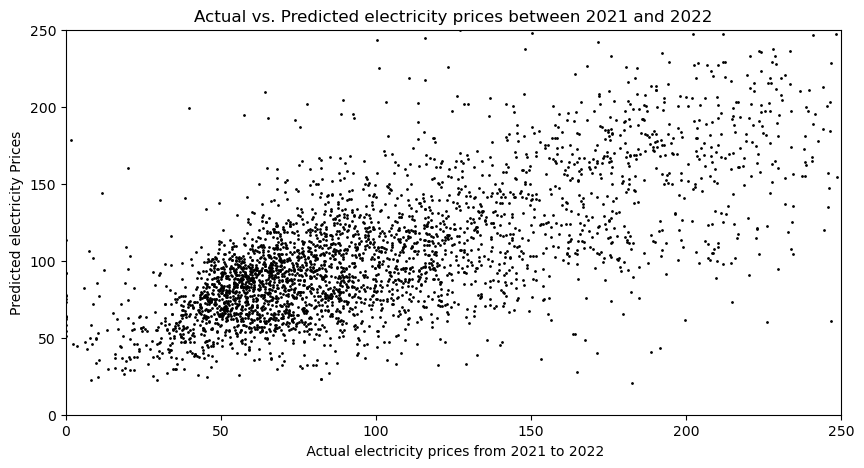

<Figure size 640x480 with 0 Axes>

In [26]:
#Importing library to plot results
import matplotlib.pyplot as plt

# Plot of predicted vs. actual prices
plt.figure(figsize=(10, 5))
plt.grid(False)
plt.scatter(y_test, predictions,color='black',s=1)
plt.xlabel(' Actual electricity prices from 2021 to 2022')
plt.ylabel('Predicted electricity Prices')
plt.title('Actual vs. Predicted electricity prices between 2021 and 2022')
min_val = 0  
max_val = 250  
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()
plt.savefig("random.jpg", facecolor="k")

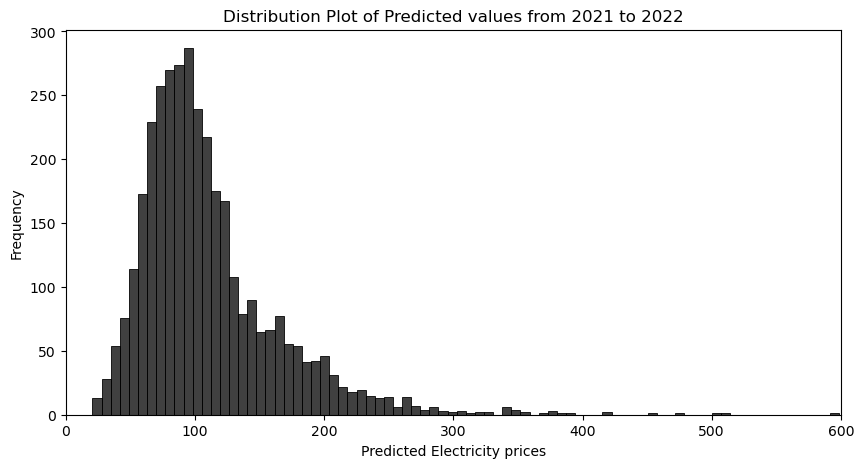

<Figure size 640x480 with 0 Axes>

In [20]:
#Potting distribution of predition

plt.figure(figsize=(10, 5))
sn.histplot(predictions1, color='black')
plt.title('Distribution Plot of Predicted values from 2021 to 2022')
plt.xlabel('Predicted Electricity prices')
plt.ylabel('Frequency')
plt.xlim(min_val, max_val)
min_val = 0  # Replace with the minimum value you want to set for both x and y axes
max_val =600 # Replace with the maximum value you want to set for both x and y axes
plt.show()
plt.savefig('distribution_plot.png')

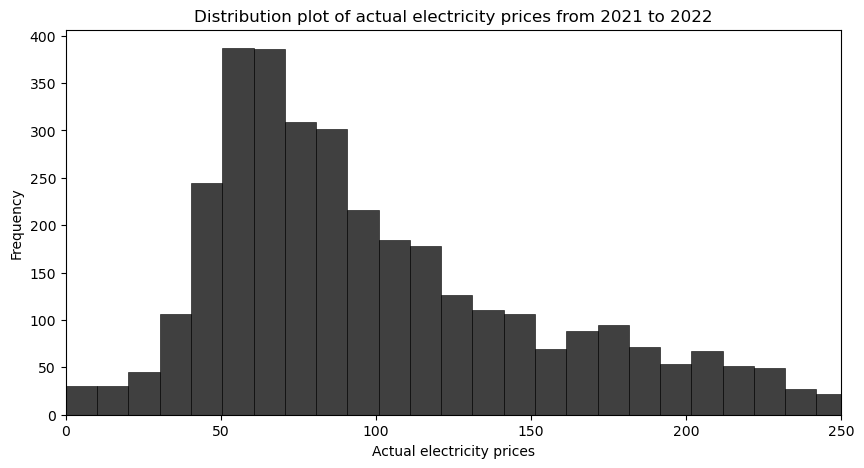

In [21]:
#Plotting distribution of actual values

plt.figure(figsize=(10, 5))
sn.histplot(y_test, color='black')
plt.grid(False)
min_val = 0  # Replace with the minimum value you want to set for both x and y axes
max_val =250  # Replace with the maximum value you want to set for both x and y axes
plt.xlim(min_val, max_val)
plt.title('Distribution plot of actual electricity prices from 2021 to 2022')
plt.xlabel('Actual electricity prices')
plt.ylabel('Frequency')
plt.savefig('distribution_plot.png')
plt.show()

In [22]:
# Calculating the residuals
residuals =y_test -predictions.flatten()

# Displaying the residuals
print("Residuals:")

Residuals:


In [23]:
# Getting the weights of the first layer
weights_layer1 = model.get_weights()[0]

# Calculating feature importance by summing the absolute weights for each feature
feature_importance = np.sum(np.abs(weights_layer1), axis=0)

# Printing feature importance scores
for i, importance in enumerate(feature_importance):
    print(f'Feature {i+1} Importance: {importance}')

Feature 1 Importance: 10.976393699645996
Feature 2 Importance: 10.178339958190918
Feature 3 Importance: 5.56833028793335
Feature 4 Importance: 6.4122209548950195
Feature 5 Importance: 5.608269214630127
Feature 6 Importance: 5.16801118850708
Feature 7 Importance: 5.357815742492676
Feature 8 Importance: 5.35765266418457
Feature 9 Importance: 7.834964275360107
